# tensorflow 입력 파이프라인 만들기

In [1]:
import tensorflow as tf

import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# np에서 표현하는 소수점의 자리수를 적는 것. 4자리면 족할듯.
np.set_printoptions(precision=4)

In [2]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [3]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


In [4]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))

dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [5]:
dataset2 = tf.data.Dataset.from_tensor_slices((tf.random.uniform([4]), tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [6]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [7]:
tf.random.uniform([4])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.6098, 0.8774, 0.5426, 0.8209], dtype=float32)>

In [8]:
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4]))

dataset4.element_spec

SparseTensorSpec(TensorShape([3, 4]), tf.int32)

In [9]:
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

In [10]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10], minval=1, maxval=10, dtype=tf.int32))

In [11]:
for i in dataset1:
    print(i.numpy())

[9 2 2 6 2 7 9 2 9 9]
[9 9 2 8 3 8 9 5 8 7]
[5 5 5 2 3 2 4 6 7 7]
[6 5 4 7 5 1 6 2 3 5]


In [12]:
dataset2 = tf.data.Dataset.from_tensor_slices((tf.random.uniform([4]), tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [13]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3

<ZipDataset shapes: ((10,), ((), (100,))), types: (tf.int32, (tf.float32, tf.int32))>

In [14]:
for a, (b, c) in dataset3:
    print(f'shapes: {a.shape}, {b.shape}, {c.shape}')

shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)


In [15]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [16]:
images, labels = train
images = images/255

# dataset 가 한 pair로 구성됨 (image, labels) 이런 식으로 구성된다. 
dataset = tf.data.Dataset.from_tensor_slices((image, labels))
for i in dataset.take(1):
    print(i)

NameError: name 'image' is not defined

In [18]:
def count(stop):
    i = 0
    while i < stop:
        yield i
        i += 1

In [19]:
for n in count(5):
    print(n)

0
1
2
3
4


In [20]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25], output_types=tf.int32, output_shapes=(),)

In [21]:
for count_batch in ds_counter.repeat().batch(10).take(10):
    print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


In [22]:
def gen_series():
    i = 0
    while True:
        size = np.random.randint(0, 10)
        yield i, np.random.normal(size=(size,))
        i += 1

In [23]:
for i, series in gen_series():
    print(i, ":", str(series))
    if i > 5:
        break

0 : [ 6.6339e-01  1.4650e-04 -1.1103e+00 -1.6022e+00 -1.5076e+00  5.1815e-01
 -1.1392e+00  1.3680e+00 -1.7906e+00]
1 : [ 2.1288 -0.2292  0.2265  0.8497  0.006   1.0323  0.3714]
2 : [0.345  0.4985]
3 : [-0.8674 -0.1594 -1.3121  2.7465  1.0553  0.682   0.1453]
4 : [-0.1766  1.8881 -0.4521 -0.0301 -1.0012  0.7685 -1.1746 -1.0108]
5 : [-0.2763 -0.5325  1.1817 -1.4604  1.2564  1.3793 -0.284 ]
6 : [ 2.0647 -0.6044  0.3636  0.5499 -1.0625 -0.8979 -1.8531 -0.9313]


In [24]:
np.random.randint(0, 10)

7

In [25]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [137]:
df = pd.read_csv(titanic_file)
df.head()
df.shape

(627, 10)

In [27]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))
# print(titanic_slices)
for feature_batch in titanic_slices.take(1):
    print(type(feature_batch))
    for key, value in feature_batch.items():
        print(f"{key:20s}: {value}")

<class 'dict'>
survived            : 0
sex                 : b'male'
age                 : 22.0
n_siblings_spouses  : 1
parch               : 0
fare                : 7.25
class               : b'Third'
deck                : b'unknown'
embark_town         : b'Southampton'
alone               : b'n'


In [28]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4, label_name="survived")

In [29]:
for feature_batch, label_batch in titanic_batches.take(1):
    print(f"survived: {label_batch}")
    print("features: ")
    for key, value in feature_batch.items():
        print(f"{key:20s} : {value}")

survived: [0 0 0 0]
features: 
sex                  : [b'male' b'male' b'male' b'male']
age                  : [28. 15. 46. 34.]
n_siblings_spouses   : [0 1 0 0]
parch                : [0 1 0 0]
fare                 : [ 7.8958  7.2292 26.      6.4958]
class                : [b'Third' b'Third' b'Second' b'Third']
deck                 : [b'unknown' b'unknown' b'unknown' b'unknown']
embark_town          : [b'Southampton' b'Cherbourg' b'Southampton' b'Southampton']
alone                : [b'y' b'n' b'y' b'y']


In [30]:
titanic_batches = tf.data.experimental.make_csv_dataset(
        titanic_file, batch_size=4,
        label_name="survived", select_columns=["class", "fare", "survived"]
)

In [31]:
for feature_batch, label_batch in titanic_batches.take(1):
    print(f"survived : {label_batch}")
    for key, value in feature_batch.items():
        print(f"{key:20s}: {value}")

survived : [0 1 0 0]
fare                : [ 7.65   18.7875 26.      8.4583]
class               : [b'Third' b'Third' b'Second' b'Third']


In [32]:
titanic_types = [tf.int32, tf.string, tf.float32, tf.int32, tf.int32, tf.float32, tf.string, tf.string, tf.string, tf.string]
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types, header=True)
print(type(dataset))
for line in dataset.take(1):
    print(line)
    print([item.numpy() for item in line])

<class 'tensorflow.python.data.experimental.ops.readers.CsvDatasetV2'>
(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=string, numpy=b'male'>, <tf.Tensor: shape=(), dtype=float32, numpy=22.0>, <tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=float32, numpy=7.25>, <tf.Tensor: shape=(), dtype=string, numpy=b'Third'>, <tf.Tensor: shape=(), dtype=string, numpy=b'unknown'>, <tf.Tensor: shape=(), dtype=string, numpy=b'Southampton'>, <tf.Tensor: shape=(), dtype=string, numpy=b'n'>)
[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [33]:
%%writefile missing.csv
1,2,3,4
,2,3,4
1,,3,4
1,2,,4
1,2,3,
,,,

Overwriting missing.csv


In [34]:
record_defaults = [999, 999, 999, 999]
dataset = tf.data.experimental.CsvDataset("missing.csv", record_defaults)
for i in dataset:
    print(i)
    break
dataset = dataset.map(lambda *items: tf.stack(items))
for i in dataset:
    print(i)
    break

(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=4>)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)


In [35]:
for line in dataset:
    print(line.numpy())

[1 2 3 4]
[999   2   3   4]
[  1 999   3   4]
[  1   2 999   4]
[  1   2   3 999]
[999 999 999 999]


In [36]:
record_defaults = [999, 999]
dataset = tf.data.experimental.CsvDataset("missing.csv", record_defaults, select_cols=[1, 3])
dataset = dataset.map(lambda *items: tf.stack(items))
dataset

<MapDataset shapes: (2,), types: tf.int32>

In [37]:
for line in dataset:
    print(line.numpy())

[2 4]
[2 4]
[999   4]
[2 4]
[  2 999]
[999 999]


In [38]:
flowers_root = tf.keras.utils.get_file("flower_photos", 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)
flowers_root = pathlib.Path(flowers_root)

In [39]:
for item in flowers_root.glob("*"):
    print(item.name)

roses
sunflowers
daisy
dandelion
tulips
LICENSE.txt


In [40]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

for f in list_ds.take(5):
    print(f.numpy())

b'/Users/jk/.keras/datasets/flower_photos/tulips/4312181724_16dab26afb_n.jpg'
b'/Users/jk/.keras/datasets/flower_photos/daisy/3552074420_2a0a7166db_m.jpg'
b'/Users/jk/.keras/datasets/flower_photos/daisy/14087947408_9779257411_n.jpg'
b'/Users/jk/.keras/datasets/flower_photos/tulips/113960470_38fab8f2fb_m.jpg'
b'/Users/jk/.keras/datasets/flower_photos/tulips/8768645961_8f1e097170_n.jpg'


In [41]:
def process_path(file_path):
    label = tf.strings.split(file_path, os.sep)[-2]
    return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

In [42]:
for image_raw, label_text in labeled_ds.take(1):
    print(repr(image_raw.numpy()[:100]))
    print()
    print(label_text.numpy())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00'

b'daisy'


In [48]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)

for batch in batched_dataset.take(4):
    print([arr.numpy() for arr in batch])


[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]


In [50]:
batched_dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

In [51]:
batched_dataset = dataset.batch(7, drop_remainder=True)
for inc, dec in batched_dataset:
    print(inc.numpy(), dec.numpy())

[0 1 2 3 4 5 6] [ 0 -1 -2 -3 -4 -5 -6]
[ 7  8  9 10 11 12 13] [ -7  -8  -9 -10 -11 -12 -13]
[14 15 16 17 18 19 20] [-14 -15 -16 -17 -18 -19 -20]
[21 22 23 24 25 26 27] [-21 -22 -23 -24 -25 -26 -27]
[28 29 30 31 32 33 34] [-28 -29 -30 -31 -32 -33 -34]
[35 36 37 38 39 40 41] [-35 -36 -37 -38 -39 -40 -41]
[42 43 44 45 46 47 48] [-42 -43 -44 -45 -46 -47 -48]
[49 50 51 52 53 54 55] [-49 -50 -51 -52 -53 -54 -55]
[56 57 58 59 60 61 62] [-56 -57 -58 -59 -60 -61 -62]
[63 64 65 66 67 68 69] [-63 -64 -65 -66 -67 -68 -69]
[70 71 72 73 74 75 76] [-70 -71 -72 -73 -74 -75 -76]
[77 78 79 80 81 82 83] [-77 -78 -79 -80 -81 -82 -83]
[84 85 86 87 88 89 90] [-84 -85 -86 -87 -88 -89 -90]
[91 92 93 94 95 96 97] [-91 -92 -93 -94 -95 -96 -97]


In [53]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None,))

for batch in dataset.take(2):
    print(batch.numpy())
    print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



In [77]:
dataset = tf.data.Dataset.range(100)
for i in dataset.take(2):
    print([tf.cast(i, tf.int32)])

print()
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None,))

for batch in dataset.take(2):
    print(batch.numpy())
    print()


[<tf.Tensor: shape=(), dtype=int32, numpy=0>]
[<tf.Tensor: shape=(), dtype=int32, numpy=1>]

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



In [78]:
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [79]:
def plot_batch_sizes(ds):
    batch_sizes = [batch.shape[0] for batch in ds]
    plt.bar(range(len(batch_sizes)), batch_sizes)
    plt.xlabel("Batch number")
    plt.ylabel("Batch size")

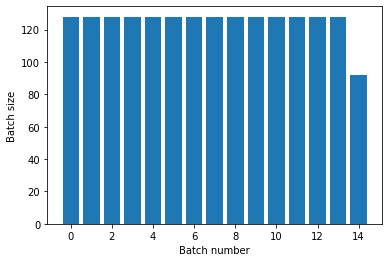

In [81]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)

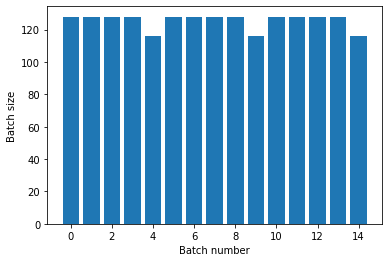

In [82]:
titanic_batches = titanic_lines.batch(128).repeat(3)
plot_batch_sizes(titanic_batches)

In [127]:
epochs = 3
dataset = titanic_lines.repeat(2).batch(128)

for epoch in range(epochs):
    for batch in dataset:
        print(batch.shape)
    print("End of epoch: ", epoch)

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(104,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(104,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(104,)
End of epoch:  2


In [100]:
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()

dataset = tf.data.Dataset.zip((counter, lines))
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(20)
dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

In [103]:
n, line_batch = next(iter(dataset))
print(line_batch.numpy())

[b'0,male,65.0,0,1,61.9792,First,B,Cherbourg,n'
 b'1,male,23.0,0,1,63.3583,First,D,Cherbourg,n'
 b'0,male,25.0,0,0,7.65,Third,F,Southampton,y'
 b'0,male,28.0,0,0,7.75,Third,unknown,Queenstown,y'
 b'0,female,40.0,1,0,9.475,Third,unknown,Southampton,n'
 b'0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y'
 b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
 b'0,male,59.0,0,0,7.25,Third,unknown,Southampton,y'
 b'1,male,28.0,0,0,35.5,First,A,Southampton,y'
 b'1,male,28.0,0,0,13.0,Second,unknown,Southampton,y'
 b'1,female,38.0,1,5,31.3875,Third,unknown,Southampton,n'
 b'0,male,66.0,0,0,10.5,Second,unknown,Southampton,y'
 b'0,male,28.0,0,0,7.8958,Third,unknown,Cherbourg,y'
 b'1,male,28.0,0,0,7.2292,Third,unknown,Cherbourg,y'
 b'0,male,37.0,2,0,7.925,Third,unknown,Southampton,n'
 b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
 b'0,male,42.0,1,0,52.0,First,unknown,Southampton,n'
 b'0,female,27.0,1,0,21.0,Second,unknown,Southampton,n'
 b'0,male,28.0,0,0,8.05,Third,unknown,Southamp

In [105]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.skip(6)
list(dataset.as_numpy_iterator())


[6, 7, 8, 9]

In [149]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.shuffle(buffer_size=100).batch(10).repeat(2)

print("Here are the item ID's near the epoch boundary:\n")
sr_list = []
for n, line_batch in shuffled.take(63):
    sr_list += n.numpy().tolist()
sr_list.sort()
sr_list
print(len(sr_list))
tmp = range(628)
for idx, value in enumerate(sr_list):
    if value != tmp[idx]:
        print(value, tmp[idx], "틀림")
    else:
        print(value, tmp[idx], "맞음")

Here are the item ID's near the epoch boundary:

628
0 0 맞음
1 1 맞음
2 2 맞음
3 3 맞음
4 4 맞음
5 5 맞음
6 6 맞음
7 7 맞음
8 8 맞음
9 9 맞음
10 10 맞음
11 11 맞음
12 12 맞음
13 13 맞음
14 14 맞음
15 15 맞음
16 16 맞음
17 17 맞음
18 18 맞음
19 19 맞음
20 20 맞음
21 21 맞음
22 22 맞음
23 23 맞음
24 24 맞음
25 25 맞음
26 26 맞음
27 27 맞음
28 28 맞음
29 29 맞음
30 30 맞음
31 31 맞음
32 32 맞음
33 33 맞음
34 34 맞음
35 35 맞음
36 36 맞음
37 37 맞음
38 38 맞음
39 39 맞음
40 40 맞음
41 41 맞음
42 42 맞음
43 43 맞음
44 44 맞음
45 45 맞음
46 46 맞음
47 47 맞음
48 48 맞음
49 49 맞음
50 50 맞음
51 51 맞음
52 52 맞음
53 53 맞음
54 54 맞음
55 55 맞음
56 56 맞음
57 57 맞음
58 58 맞음
59 59 맞음
60 60 맞음
61 61 맞음
62 62 맞음
63 63 맞음
64 64 맞음
65 65 맞음
66 66 맞음
67 67 맞음
68 68 맞음
69 69 맞음
70 70 맞음
71 71 맞음
72 72 맞음
73 73 맞음
74 74 맞음
75 75 맞음
76 76 맞음
77 77 맞음
78 78 맞음
79 79 맞음
80 80 맞음
81 81 맞음
82 82 맞음
83 83 맞음
84 84 맞음
85 85 맞음
86 86 맞음
87 87 맞음
88 88 맞음
89 89 맞음
90 90 맞음
91 91 맞음
92 92 맞음
93 93 맞음
94 94 맞음
95 95 맞음
96 96 맞음
97 97 맞음
98 98 맞음
99 99 맞음
100 100 맞음
101 101 맞음
102 102 맞음
103 103 맞음
104 104 맞음
105 105 맞음
1

126


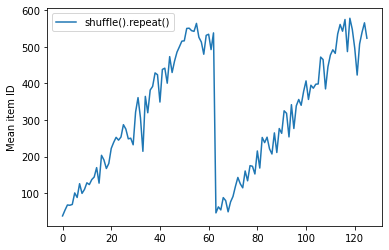

In [123]:
shuffle_repeat = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffle_repeat, label="shuffle().repeat()")
plt.ylabel("Mean item ID")
plt.legend()

print(len(shuffle_repeat))

In [150]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.repeat(2).shuffle(buffer_size=100).batch(10)

sr_list = []
for n, line_batch in shuffled.take(63):
    sr_list += n.numpy().tolist()
sr_list.sort()
sr_list
print(len(sr_list))
tmp = range(628)
for idx, value in enumerate(sr_list):
    if value != tmp[idx]:
        print(value, tmp[idx], "틀림")
    else:
        print(value, tmp[idx], "맞음")

630
0 0 맞음
0 1 틀림
1 2 틀림
1 3 틀림
2 4 틀림
3 5 틀림
3 6 틀림
4 7 틀림
4 8 틀림
5 9 틀림
5 10 틀림
6 11 틀림
7 12 틀림
7 13 틀림
8 14 틀림
9 15 틀림
9 16 틀림
10 17 틀림
10 18 틀림
11 19 틀림
11 20 틀림
12 21 틀림
12 22 틀림
13 23 틀림
14 24 틀림
15 25 틀림
16 26 틀림
17 27 틀림
17 28 틀림
18 29 틀림
18 30 틀림
19 31 틀림
19 32 틀림
20 33 틀림
20 34 틀림
21 35 틀림
22 36 틀림
23 37 틀림
23 38 틀림
24 39 틀림
24 40 틀림
25 41 틀림
26 42 틀림
27 43 틀림
28 44 틀림
29 45 틀림
29 46 틀림
30 47 틀림
30 48 틀림
31 49 틀림
32 50 틀림
32 51 틀림
33 52 틀림
33 53 틀림
34 54 틀림
35 55 틀림
36 56 틀림
37 57 틀림
37 58 틀림
38 59 틀림
39 60 틀림
39 61 틀림
40 62 틀림
41 63 틀림
42 64 틀림
42 65 틀림
43 66 틀림
43 67 틀림
44 68 틀림
45 69 틀림
46 70 틀림
47 71 틀림
48 72 틀림
49 73 틀림
49 74 틀림
50 75 틀림
51 76 틀림
51 77 틀림
52 78 틀림
52 79 틀림
53 80 틀림
53 81 틀림
54 82 틀림
55 83 틀림
56 84 틀림
57 85 틀림
57 86 틀림
58 87 틀림
59 88 틀림
60 89 틀림
60 90 틀림
61 91 틀림
62 92 틀림
63 93 틀림
63 94 틀림
64 95 틀림
64 96 틀림
65 97 틀림
65 98 틀림
66 99 틀림
67 100 틀림
67 101 틀림
68 102 틀림
69 103 틀림
70 104 틀림
71 105 틀림
72 106 틀림
73 107 틀림
74 108 틀림
74 109 틀림
75 110 틀림
76 111 틀림
77 

IndexError: range object index out of range

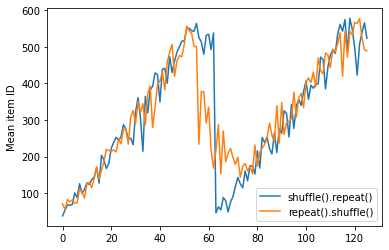

In [125]:
repeat_shuffle = [n.numpy().mean() for n, line_batch in shuffled]

plt.plot(shuffle_repeat, label="shuffle().repeat()")
plt.plot(repeat_shuffle, label="repeat().shuffle()")
plt.ylabel("Mean item ID")
plt.legend()

In [151]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [163]:
def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)
    label = parts[-2]
    
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label

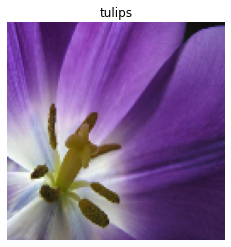

In [164]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label.numpy().decode('utf-8'))
    plt.axis('off')
    
show(image, label)

<MapDataset shapes: ((128, 128, None), ()), types: (tf.float32, tf.string)>


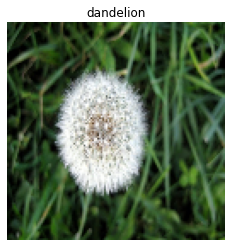

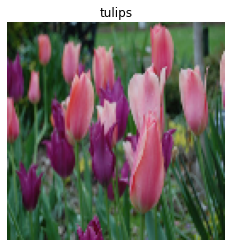

In [166]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
    show(image, label)

In [167]:
import scipy.ndimage as ndimage

def random_rotate_image(image):
    image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


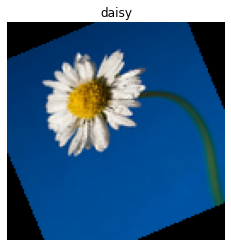

In [177]:
image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)

In [180]:
def tf_random_rotate_image(image, label):
    im_shape = image.shape
    [image, ] = tf.py_function(random_rotate_image, [image], [tf.float32])
    image.set_shape(im_shape)
    return image, label


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


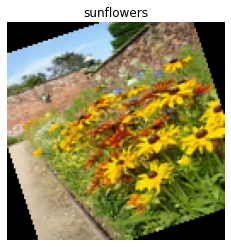

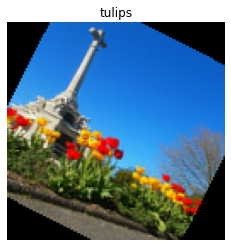

In [181]:
rot_ds = images_ds.map(tf_random_rotate_image)

for image, label in rot_ds.take(2):
    show(image, label)

In [182]:
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")
dataset = tf.data.TFRecordDataset(filenames = [fsns_test_file])
dataset

7905280/7904079 [==============================] - 0s 0us/step


<TFRecordDatasetV2 shapes: (), types: tf.string>

parsed : <class 'tensorflow.core.example.example_pb2.Example'>
parsed.features : <class 'tensorflow.core.example.feature_pb2.Features'>
parsed.features.feature : <class 'google.protobuf.pyext._message.MessageMapContainer'>
feature['image/encoded'] : <class 'tensorflow.core.example.feature_pb2.Feature'>
feature['image/encoded'].bytes_list : <class 'tensorflow.core.example.feature_pb2.BytesList'>
feature['image/encoded'].bytes_list.value : <class 'google.protobuf.pyext._message.RepeatedScalarContainer'>
feature['image/encoded'].bytes_list.value[0] : <class 'bytes'>


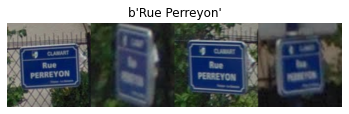

In [210]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())
feature = parsed.features.feature

raw_img = feature['image/encoded'].bytes_list.value[0]
tmp = feature['image/class']
print(f"parsed : {type(parsed)}")
print(f"parsed.features : {type(parsed.features)}")
print(f"parsed.features.feature : {type(parsed.features.feature)}")
print(f"feature['image/encoded'] : {type(feature['image/encoded'])}")
print(f"feature['image/encoded'].bytes_list : {type(feature['image/encoded'].bytes_list)}")
print(f"feature['image/encoded'].bytes_list.value : {type(feature['image/encoded'].bytes_list.value)}")
print(f"feature['image/encoded'].bytes_list.value[0] : {type(feature['image/encoded'].bytes_list.value[0])}")

img = tf.image.decode_png(raw_img)
plt.imshow(img)
plt.axis("off")
_ = plt.title(feature["image/text"].bytes_list.value[0])

In [211]:
raw_example = next(iter(dataset))

In [212]:
def tf_parse(eg):
    example = tf.io.parse_example(
    eg[tf.newaxis], {
        'image/encoded': tf.io.FixedLenFeature(shape=(), dtype=tf.string),
        "image/text": tf.io.FixedLenFeature(shape=(), dtype=tf.string)
    })
    return example['image/encoded'][0], example["image/text"][0]

In [214]:
img, txt = tf_parse(raw_example)
print(txt.numpy())
print(repr(img.numpy()[:20]), "...")
print(raw_example[tf.newaxis])

b'Rue Perreyon'
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X' ...
tf.Tensor([b'\n\xeb\xf0\x07\n\x1a\n\x10image/orig_width\x12\x06\x1a\x04\n\x02\xd8\x04\n\x1e\n\nimage/text\x12\x10\n\x0e\n\x0cRue Perreyon\n(\n\x14image/unpadded_class\x12\x10\x1a\x0e\n\x0c1\x0b\x05\x00/\x05\x15\x15\x05!\x0c\x07\n\xe6\xee\x07\n\rimage/encoded\x12\xd3\xee\x07\n\xcf\xee\x07\n\xcb\xee\x07\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x00\x96\x08\x02\x00\x00\x00\x8dyaf\x00\x00\x00\tpHYs\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9db&2\x00\x00 \x00IDATx\x9c\xa4\xbd\xd9\x96$\xc9\x91%&\x8b\xaa\x9a\xf9\x16\x11\x99UYUh4\x9a\xe7\xb0y\x0e\x7fv^\xf9\xc0\x7f\xe0\x1b\x1f\xf8;=\xbd\xcc\x00\xa8\xca%2|1U\x95e\x1eD\xcd\xc2#\xb3\xd0 \x87V\xc8@\xf8\x12\xe6f\xaa\xb2\\\xb9\xb28\xfe\x9f\xff\xc7\x7fqw\x00\x88\x9f\xaajf\x88\x08\x00\xf7?\x19\x10\xd6#\xde\xb9\xbd\xb4=\x1c\xe7\x01wrB\xc2\xbb\xc3\xdd[k\xf1\xfe\xfb\x83\x1c\xd0\xbfy\xee\xf5\x84\xdf<\xe3w\x7f\xbd\x9dJU\xbf\xfd{\x00w\x04\x00fffw73UqG"\xfe\xe6\xbe\x00\xa0\xb5v\x

In [215]:
decoded = dataset.map(tf_parse)
decoded

<MapDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [216]:
image_batch, text_batch = next(iter(decoded.batch(10)))
image_batch.shape

TensorShape([10])

In [217]:
range_ds = tf.data.Dataset.range(100000)

In [218]:
batches = range_ds.batch(10, drop_remainder=True)

for batch in batches.take(5):
    print(batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]


In [220]:
def dense_1_step(batch):
    return batch[:-1], batch[1:]

predict_dense_1_step = batches.map(dense_1_step)
for features, label in predict_dense_1_step.take(3):
    print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7 8]  =>  [1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18]  =>  [11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28]  =>  [21 22 23 24 25 26 27 28 29]


In [221]:
batches = range_ds.batch(15, drop_remainder=True)

def label_next_5_steps(batch):
    return (batch[:-5], batch[-5:])

predict_5_steps = batches.map(label_next_5_steps)

for features, label in predict_5_steps.take(3):
    print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7 8 9]  =>  [10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]  =>  [25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]  =>  [40 41 42 43 44]


In [224]:
feature_length = 10
label_length = 3

features = range_ds.batch(feature_length, drop_remainder=True)
labels = range_ds.batch(feature_length).skip(1).map(lambda labels: labels[:label_length])

predicted_steps = tf.data.Dataset.zip((features, labels))

for features, label in predicted_steps.take(5):
    print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7 8 9]  =>  [10 11 12]
[10 11 12 13 14 15 16 17 18 19]  =>  [20 21 22]
[20 21 22 23 24 25 26 27 28 29]  =>  [30 31 32]
[30 31 32 33 34 35 36 37 38 39]  =>  [40 41 42]
[40 41 42 43 44 45 46 47 48 49]  =>  [50 51 52]


In [225]:
window_size = 5

windows = range_ds.window(window_size, shift=1)
for sub_ds in windows.take(5):
    print(sub_ds)

<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>


In [226]:
zip_path = tf.keras.utils.get_file(
origin='https://storage.googleapis.com/download.tensorflow.org/data/creditcard.zip',
    fname="creditcard.zip",
    extract=True
)

csv_path = zip_path.replace(".zip", ".csv")

69156864/69155632 [==============================] - 3s 0us/step


In [227]:
creditcard_ds = tf.data.experimental.make_csv_dataset(
    csv_path, batch_size=1024, label_name='Class',
    column_defaults=[float()]*30 + [int()]
)

In [238]:
def count(counts, batch):
    features, labels = batch
    class_1 = labels == 1
    class_1 = tf.cast(class_1, tf.int32)
    
    class_0 = labels == 0
    class_0 = tf.cast(class_0, tf.int32)
    
    counts['class_0'] += tf.reduce_sum(class_0)
    counts['class_1'] += tf.reduce_sum(class_1)
    
    return counts

In [239]:
print([float()]*30+[int()])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]


In [244]:
counts = creditcard_ds.take(10).reduce(
    initial_state={"class_0": 0, "class_1":0},
    reduce_func = count)

print(type(counts))
print(counts)
counts = np.array([counts['class_0'].numpy(),
                  counts["class_1"].numpy()]).astype(np.float32)
print(counts)
fractions = counts/counts.sum()
print(fractions)

<class 'dict'>
{'class_0': <tf.Tensor: shape=(), dtype=int32, numpy=10199>, 'class_1': <tf.Tensor: shape=(), dtype=int32, numpy=41>}
[10199.    41.]
[0.996 0.004]


In [245]:
negative_ds = (
    creditcard_ds.unbatch().filter(lambda features, label: label==0).repeat())
positive_ds = (
    creditcard_ds.unbatch().filter(lambda features, label: label==1).repeat())



In [246]:
for features, label in positive_ds.batch(10).take(1):
    print(label.numpy())

[1 1 1 1 1 1 1 1 1 1]


In [252]:
balanced_ds = tf.data.experimental.sample_from_datasets(
    [negative_ds, positive_ds], [0.5, 0.5]).batch(10)

In [253]:
for features, labels in balanced_ds.take(50):
    print(labels.numpy())

[0 0 1 0 0 0 0 1 0 0]
[1 0 1 1 1 1 1 0 0 0]
[1 0 1 0 0 1 0 1 0 0]
[1 0 1 0 1 0 0 0 0 1]
[0 0 1 1 1 1 0 0 0 0]
[0 0 1 1 1 1 1 1 1 0]
[0 1 1 1 1 0 0 1 1 0]
[1 1 0 0 1 1 1 1 1 0]
[0 0 1 0 0 0 1 0 0 1]
[0 0 1 1 0 1 0 0 1 0]
[0 1 1 1 0 1 0 0 0 1]
[0 0 1 1 0 1 1 0 0 0]
[1 0 0 1 1 1 0 0 1 0]
[1 1 1 1 0 0 1 1 1 0]
[0 0 0 0 0 0 0 0 1 0]
[1 0 1 1 1 0 0 1 1 0]
[1 0 1 1 0 0 0 0 0 1]
[1 1 1 0 1 0 1 0 0 1]
[0 1 0 1 0 0 1 1 1 1]
[0 0 1 0 1 1 1 0 1 1]
[0 1 0 1 0 0 1 1 0 1]
[1 0 0 0 1 1 1 0 1 0]
[0 0 0 0 0 0 0 1 0 1]
[1 0 0 1 1 1 0 1 0 0]
[0 0 1 1 1 0 0 1 0 1]
[0 0 1 0 1 1 1 0 1 1]
[1 1 0 1 1 0 1 1 1 1]
[1 0 0 1 0 0 0 0 0 1]
[0 0 1 1 0 0 1 1 0 0]
[1 1 0 0 0 1 0 1 1 1]
[0 0 0 1 0 0 1 0 0 1]
[1 1 1 1 0 1 1 0 1 0]
[0 0 1 1 1 1 0 1 1 1]
[1 1 0 0 0 0 1 0 0 0]
[1 0 1 1 1 1 1 1 0 0]
[1 1 0 0 0 1 1 1 0 1]
[1 1 0 0 1 0 1 1 1 0]
[1 1 1 0 1 0 0 1 0 0]
[0 0 1 1 1 1 1 1 0 1]
[0 0 0 1 1 0 1 0 0 1]
[0 0 0 1 0 0 0 1 1 0]
[1 0 0 1 0 0 1 0 1 1]
[0 1 0 0 1 1 0 0 0 1]
[0 0 1 1 0 1 0 1 0 1]
[0 0 0 1 0 0 0 1 0 0]
[0 1 1 0 0

In [254]:
def class_func(features, label):
    return label

In [257]:
resampler = tf.data.experimental.rejection_resample(
    class_func, target_dist=[0.5, 0.5], initial_dist=fractions
)

In [258]:
resample_ds = creditcard_ds.unbatch().apply(resampler).batch(10)

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:



In [259]:
balanced_ds = resample_ds.map(lambda extra_label, features_and_label: features_and_label)

In [260]:
for features, labels in balanced_ds.take(10):
    print(labels.numpy())

[0 0 1 1 1 0 1 1 0 0]
[0 1 0 1 0 0 0 1 1 1]
[0 0 0 0 0 1 0 0 0 1]
[1 1 0 1 0 0 0 1 1 1]
[1 0 0 0 1 0 0 1 0 1]
[0 1 0 0 1 0 0 1 1 0]
[0 0 1 0 0 0 1 1 0 1]
[1 0 0 0 0 1 1 1 1 1]
[0 1 0 0 1 1 1 0 1 1]
[1 0 1 0 0 0 1 1 1 1]


In [262]:
range_ds = tf.data.Dataset.range(20)

iterator = iter(range_ds)
ckpt = tf.train.Checkpoint(step=tf.Variable(0), iterator=iterator)
manager = tf.train.CheckpointManager(ckpt, '/tmp/my_ckpt', max_to_keep=3)

print([next(iterator).numpy() for _ in range(5)])

save_path = manager.save()

print([next(iterator).numpy() for _ in range(5)])

ckpt.restore(manager.latest_checkpoint)

print([next(iterator).numpy() for _ in range(5)])

[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]


In [263]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

In [264]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             metrics=["accuracy"])

In [265]:
model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 2s 819us/step - loss: 0.5991 - accuracy: 0.7985
Epoch 2/2
1875/1875 [==============================] - 1s 764us/step - loss: 0.4602 - accuracy: 0.8437


In [270]:
model.fit(fmnist_train_ds.repeat(), epochs=2, steps_per_epoch=20)

Epoch 1/2
20/20 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8687
Epoch 2/2
20/20 [==============================] - 0s 1ms/step - loss: 0.3907 - accuracy: 0.8750


In [267]:
loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss : ", loss)
print("Accuracy : ", accuracy)

1875/1875 [==============================] - 2s 648us/step - loss: 0.4317 - accuracy: 0.8524
Loss :  0.4316798150539398
Accuracy :  0.852400004863739


In [274]:
loss, acc = model.evaluate(fmnist_train_ds.repeat(), steps=10)
print("Loss : ", loss)
print("acc : ", acc)

ValueError: When providing an infinite dataset, you must specify the number of steps to run (if you did not intend to create an infinite dataset, make sure to not call `repeat()` on the dataset).

In [277]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)

result = model.predict(predict_ds, steps = 10)
print(result.shape)

(32, 28, 28)
(320, 10)
